# 🎃 Day 4 - Spell 6: Halloween Candy Analysis

In [1]:
Sys.setlocale("LC_CTYPE", "en_US.UTF-8")
# 💡 Load our magical data analysis tools
library(ggplot2)  # For beautiful visualizations
library(dplyr)    # For data cleaning and manipulation

[1] "en_US.UTF-8"

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 🧹 Step 2: Set Parameters and Load Round 1 Data

In [2]:
# 🎯 Set the maximum number of candies possible in each bag
MAX_CANDIES_PER_BAG <- 10  # Change this if needed!

# 🏰 Set the safety threshold (60% or more means SAFE)
SAFETY_THRESHOLD <- 60

cat("🎃 Maximum candies per bag:", MAX_CANDIES_PER_BAG, "\n")
cat("🛡️ Safety threshold:", SAFETY_THRESHOLD, "% (>= this percentage means SAFE)\n")

🎃 Maximum candies per bag: 10 
🛡️ Safety threshold: 60 % (>= this percentage means SAFE)


In [3]:
# 💡 Load Round 1 candy count data
# Make sure this CSV file is in your datasets folder!

# Round 1 data (replace with your actual file name)
#round1_data <- read.csv("../datasets/candy_round1.csv")
round1_data <- read.csv("../datasets/candy_round1.csv")

# Let's peek at our data structure
cat("🔍 Round 1 Data Structure:\n")
head(round1_data)

🔍 Round 1 Data Structure:


,Timestamp,What.s.your.wizard.name,How.many.candies.do.you.have.in.your.bag.,Do.you.think.the.Enchanted.Forest.Neighborhood.is.SAFE.or.CURSED.
,<chr>,<chr>,<int>,<chr>
1,2025/08/14 2:56:24 PM MDT,Patato,6,SAFE (>= 60% items are candy)
2,2025/08/14 2:58:04 PM MDT,Redacted,5,CURSED (< 60% items are candy)
3,2025/08/14 2:59:41 PM MDT,joe bonkers,10,SAFE (>= 60% items are candy)
4,2025/08/14 2:59:54 PM MDT,jonas,2,CURSED (< 60% items are candy)
5,2025/08/14 3:00:06 PM MDT,yaroslav,6,SAFE (>= 60% items are candy)
6,2025/08/14 3:00:06 PM MDT,Arjun,4,CURSED (< 60% items are candy)


In [4]:
# 🧹 Clean Round 1 data - use only columns 2, 3, 4 and clean data types

# Function to clean candy data
clean_candy_data <- function(data, round_name, candy_max = MAX_CANDIES_PER_BAG) {
  # Select only columns 2, 3, 4 and rename them
  cleaned <- data %>%
    select(
      wizard_name = 2,      # Column 2: wizard name
      candy_count_raw = 3,  # Column 3: candy count
      decision = 4          # Column 4: decision
    ) %>%
    # Convert candy count to numeric and clean invalid entries
    mutate(
      candy_count = as.numeric(candy_count_raw),
      round = round_name
    ) %>%
    # Remove rows with invalid candy counts (NA, negative, or above maximum)
    filter(
      !is.na(candy_count), 
      candy_count >= 0, 
      candy_count <= candy_max
    ) %>%
    # Calculate candy percentage
    mutate(
      candy_percentage = candy_count / candy_max * 100
    ) %>%
    # Keep only the columns we need
    select(wizard_name, candy_count, candy_percentage, decision, round)
  
  return(cleaned)
}

# Clean Round 1 dataset
round1_clean <- clean_candy_data(round1_data, "Round 1")

cat("✨ Round 1 Cleaned Data Summary:\n")
cat("Total wizards:", nrow(round1_clean), "\n")
cat("Valid candy counts range:", min(round1_clean$candy_count), "to", max(round1_clean$candy_count), "\n")

✨ Round 1 Cleaned Data Summary:
Total wizards: 21 
Valid candy counts range: 1 to 10 


## 📈 Step 3: Round 1 Analysis

### 3.1 Sampling Distribution for Round 1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


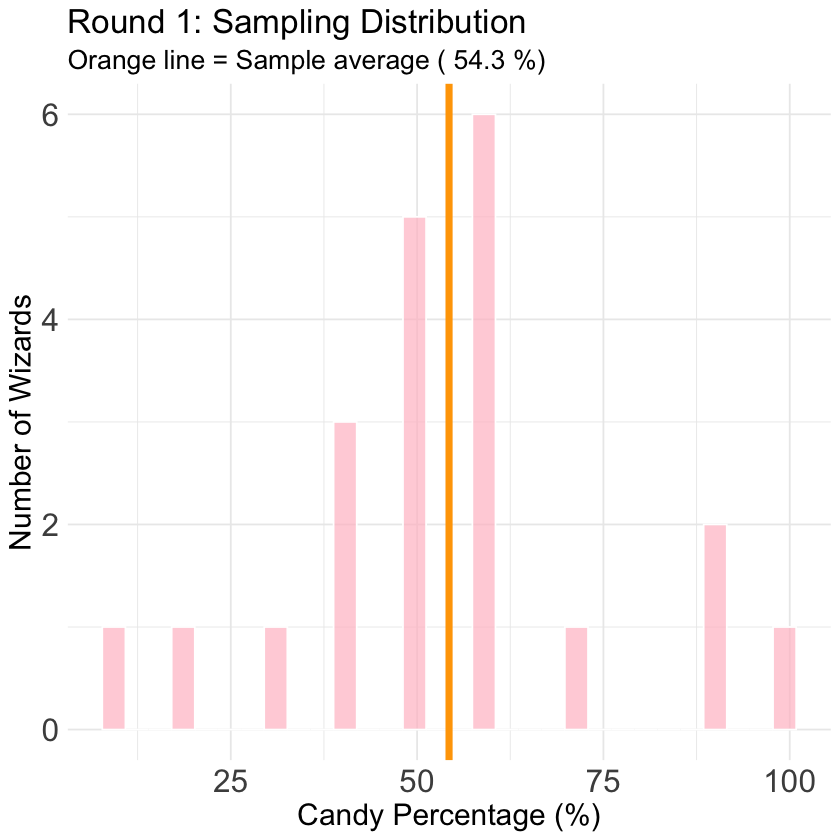

In [5]:
# 📊 Create a histogram showing everyone's candy percentages from Round 1
round1_avg <- mean(round1_clean$candy_percentage)

hist_round1 <-ggplot(round1_clean, aes(x = candy_percentage)) +
  geom_histogram(fill = "pink", color = "white", alpha = 0.7) +
  geom_vline(xintercept = round1_avg, color = "orange", linewidth = 2) +
  labs(
    title = "Round 1: Sampling Distribution",
    subtitle = paste("Orange line = Sample average (", round(round1_avg, 1), "%)"),
    x = "Candy Percentage (%)",
    y = "Number of Wizards"
  ) +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))

print(hist_round1)

### 3.2 Calculate Round 1 Statistics

In [6]:
# 📊 Calculate important statistics for Round 1
round1_std <- sd(round1_clean$candy_percentage)

cat("Round 1 Results:\n")
cat("Sample average:", round(round1_avg, 2), "%\n")
cat("Sample standard deviation:", round(round1_std, 2), "\n")
cat("Number of wizards:", nrow(round1_clean), "\n")
cat("Range of candy counts:", min(round1_clean$candy_count), "to", max(round1_clean$candy_count), "candies\n")

Round 1 Results:
Sample average: 54.29 %
Sample standard deviation: 21.81 
Number of wizards: 21 
Range of candy counts: 1 to 10 candies


### 3.3 Round 1 Predictions Analysis

In [7]:
# 📊 Analyze the predictions made by wizards in Round 1
round1_with_predictions <- round1_clean %>%
  mutate(
    predicted_answer = case_when(
      grepl("SAFE", decision, ignore.case = TRUE) ~ "SAFE",
      grepl("CURSED", decision, ignore.case = TRUE) ~ "CURSED",
      TRUE ~ "UNKNOWN"
    )
  )

# Count SAFE vs CURSED predictions
round1_summary <- round1_with_predictions %>%
  count(predicted_answer) %>%
  filter(predicted_answer %in% c("SAFE", "CURSED"))

cat("📊 Round 1 Prediction Summary:\n")
for(i in seq_len(nrow(round1_summary))) {
  cat(round1_summary$predicted_answer[i], ":", round1_summary$n[i], "wizards\n")
}

# Show individual results
cat("\n🧙‍♀️ Individual Wizard Results (Round 1):\n")
for(i in seq_len(nrow(round1_with_predictions))) {
  cat("⭐", round1_with_predictions$wizard_name[i], "- Found", 
      round1_with_predictions$candy_count[i], "candies (", 
      round(round1_with_predictions$candy_percentage[i], 1), "%) - Predicted:", 
      round1_with_predictions$predicted_answer[i], "\n")
}

📊 Round 1 Prediction Summary:
CURSED : 10 wizards
SAFE : 11 wizards

🧙‍♀️ Individual Wizard Results (Round 1):
⭐ Patato - Found 6 candies ( 60 %) - Predicted: SAFE 
⭐ Redacted - Found 5 candies ( 50 %) - Predicted: CURSED 
⭐ joe bonkers - Found 10 candies ( 100 %) - Predicted: SAFE 
⭐ jonas - Found 2 candies ( 20 %) - Predicted: CURSED 
⭐ yaroslav - Found 6 candies ( 60 %) - Predicted: SAFE 
⭐ Arjun - Found 4 candies ( 40 %) - Predicted: CURSED 
⭐ Mariya - Found 9 candies ( 90 %) - Predicted: SAFE 
⭐ Pavel Pro Max Limited Edition - Found 1 candies ( 10 %) - Predicted: CURSED 
⭐ max - Found 6 candies ( 60 %) - Predicted: SAFE 
⭐ Skye - Found 7 candies ( 70 %) - Predicted: SAFE 
⭐ Levana - Found 6 candies ( 60 %) - Predicted: SAFE 
⭐ henri :D - Found 4 candies ( 40 %) - Predicted: SAFE 
⭐ Ibaad - Found 3 candies ( 30 %) - Predicted: CURSED 
⭐ Anirudh - Found 5 candies ( 50 %) - Predicted: CURSED 
⭐ Helen ヾ(＠⌒ー⌒＠)ノ - Found 5 candies ( 50 %) - Predicted: CURSED 
⭐ Addie_:) - Found 6 candie

## 📈 Step 4: Load and Analyze Round 2 Data

### 4.1 Load Round 2 Data

In [23]:
# 💡 Load Round 2 candy count data
# Round 2 data (replace with your actual file name)  
#round2_data <- read.csv("../datasets/candy_round2.csv")
round2_data <- read.csv("../datasets/candy_round2.csv")

MAX_CANDIES_PER_BAG <- 20
# Let's peek at our data structure
cat("🔍 Round 2 Data Structure:\n")
head(round2_data)

# Clean Round 2 dataset using the same function
round2_clean <- clean_candy_data(round2_data, "Round 2", candy_max = MAX_CANDIES_PER_BAG)

cat("\n✨ Round 2 Cleaned Data Summary:\n")
cat("Total wizards:", nrow(round2_clean), "\n")
cat("Valid candy counts range:", min(round2_clean$candy_count), "to", max(round2_clean$candy_count), "\n")

🔍 Round 2 Data Structure:


,Timestamp,What.s.your.wizard.name,How.many.candies.do.you.have.in.your.bag...enter.number.only.please.,Do.you.think.the.Enchanted.Forest.Neighborhood.is.SAFE.or.CURSED.
,<chr>,<chr>,<dbl>,<chr>
1,2025/08/10 12:15:09 AM MDT,,25.000,SAFE (>= 80% items are candy)
2,2025/08/14 2:58:11 PM MDT,Pavel 3.0,Inf,CURSED (< 60% items are candy)
3,2025/08/14 3:00:20 PM MDT,Amypeach,4.000,CURSED (< 60% items are candy)
4,2025/08/14 3:02:40 PM MDT,Yao,1.000,CURSED (< 60% items are candy)
5,2025/08/14 3:13:06 PM MDT,potato,10.000,SAFE (>= 60% items are candy)
6,2025/08/14 3:13:53 PM MDT,Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky,6.767,CURSED (< 60% items are candy)



✨ Round 2 Cleaned Data Summary:
Total wizards: 24 
Valid candy counts range: 1 to 14 


In [24]:
round2_clean <- round2_clean[which(round2_clean$candy_count > 1),]

### 4.2 Sampling Distribution for Round 2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


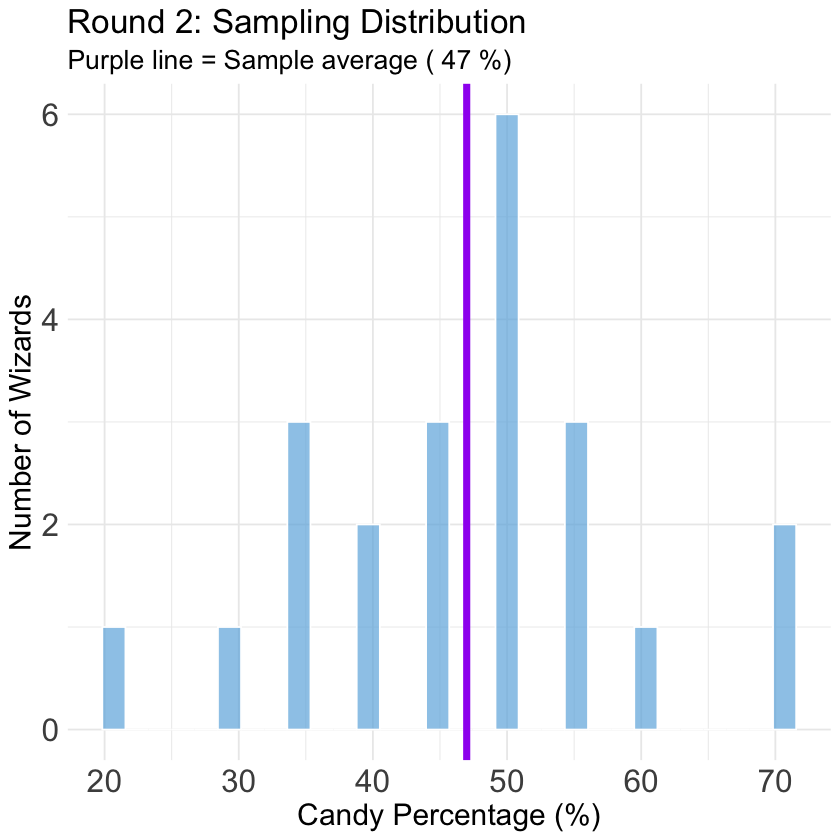

In [25]:
# 📊 Create a histogram showing everyone's candy percentages from Round 2
round2_avg <- mean(round2_clean$candy_percentage)

hist_round2 <- ggplot(round2_clean, aes(x = candy_percentage)) +
  geom_histogram(fill = "#6cb2e0", color = "white", alpha = 0.7) +
  geom_vline(xintercept = round2_avg, color = "purple", linewidth = 2) +
  labs(
    title = "Round 2: Sampling Distribution",
    subtitle = paste("Purple line = Sample average (", round(round2_avg, 1), "%)"),
    x = "Candy Percentage (%)",
    y = "Number of Wizards"
  ) +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))

print(hist_round2)

### 4.3 Calculate Round 2 Statistics

In [26]:
# 📊 Calculate important statistics for Round 2
round2_std <- sd(round2_clean$candy_percentage)

cat("Round 2 Results:\n")
cat("Sample average:", round(round2_avg, 2), "%\n")
cat("Sample standard deviation:", round(round2_std, 2), "\n")
cat("Number of wizards:", nrow(round2_clean), "\n")
cat("Range of candy counts:", min(round2_clean$candy_count), "to", max(round2_clean$candy_count), "candies\n")

Round 2 Results:
Sample average: 46.99 %


Sample standard deviation: 12.08 
Number of wizards: 22 
Range of candy counts: 4 to 14 candies


### 4.4 Round 2 Predictions Analysis

In [27]:
# 📊 Analyze the predictions made by wizards in Round 2
round2_with_predictions <- round2_clean %>%
  mutate(
    predicted_answer = case_when(
      grepl("SAFE", decision, ignore.case = TRUE) ~ "SAFE",
      grepl("CURSED", decision, ignore.case = TRUE) ~ "CURSED",
      TRUE ~ "UNKNOWN"
    )
  )

# Count SAFE vs CURSED predictions
round2_summary <- round2_with_predictions %>%
  count(predicted_answer) %>%
  filter(predicted_answer %in% c("SAFE", "CURSED"))

cat("📊 Round 2 Prediction Summary:\n")
for(i in seq_len(nrow(round2_summary))) {
  cat(round2_summary$predicted_answer[i], ":", round2_summary$n[i], "wizards\n")
}

# Show individual results
cat("\n🧙‍♀️ Individual Wizard Results (Round 2):\n")
for(i in seq_len(nrow(round2_with_predictions))) {
  cat("⭐", round2_with_predictions$wizard_name[i], "- Found", 
      round2_with_predictions$candy_count[i], "candies (", 
      round(round2_with_predictions$candy_percentage[i], 1), "%) - Predicted:", 
      round2_with_predictions$predicted_answer[i], "\n")
}

📊 Round 2 Prediction Summary:
CURSED : 15 wizards
SAFE : 7 wizards

🧙‍♀️ Individual Wizard Results (Round 2):
⭐ Amypeach - Found 4 candies ( 20 %) - Predicted: CURSED 
⭐ potato - Found 10 candies ( 50 %) - Predicted: SAFE 
⭐ Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky  - Found 6.767 candies ( 33.8 %) - Predicted: CURSED 
⭐ Joe Bonkers - Found 14 candies ( 70 %) - Predicted: SAFE 
⭐ Yao - Fo

## 🔍 Step 5: Compare Both Rounds

### 5.1 Overlay the Distributions

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


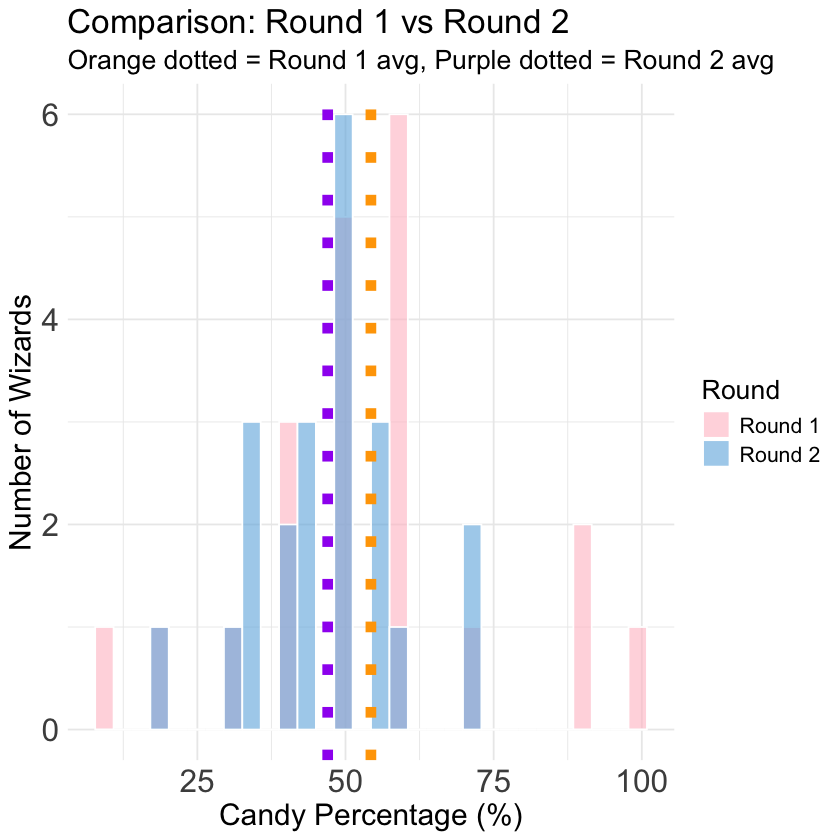

In [28]:
# 🎨 Combine both datasets for comparison
combined_data <- bind_rows(round1_clean, round2_clean)

# Create overlapping histograms
hist_combined <- ggplot(combined_data, aes(x = candy_percentage, fill = round)) +
  geom_histogram(alpha = 0.6, position = "identity", color = "white") +
  geom_vline(xintercept = round1_avg, color = "orange", linewidth = 3, linetype = "dotted") +
  geom_vline(xintercept = round2_avg, color = "purple", linewidth = 3, linetype = "dotted") +
  scale_fill_manual(values = c("Round 1" = "pink", "Round 2" = "#6cb2e0")) +
  labs(
    title = "Comparison: Round 1 vs Round 2",
    subtitle = "Orange dotted = Round 1 avg, Purple dotted = Round 2 avg",
    x = "Candy Percentage (%)",
    y = "Number of Wizards",
    fill = "Round"
  ) +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))

print(hist_combined)

### 5.2 Basic Statistical Comparison

In [29]:
cat("📊 COMPARISON OF BOTH ROUNDS:\n")
cat(paste(rep("=", 40), collapse = ""), "\n")

cat("📈 Sample Averages:\n")
cat("Round 1 average:", round(round1_avg, 2), "%\n")
cat("Round 2 average:", round(round2_avg, 2), "%\n")

cat("\n📏 Sample Spreads (Standard Deviation):\n")
cat("Round 1 spread:", round(round1_std, 2), "%\n")
cat("Round 2 spread:", round(round2_std, 2), "%\n")

cat("\n🎯 Sample Sizes:\n")
cat("Round 1:", nrow(round1_clean), "wizards\n")
cat("Round 2:", nrow(round2_clean), "wizards\n")

# Basic comparison without true value
avg_difference <- abs(round1_avg - round2_avg)
cat("\n🔍 Difference between round averages:", round(avg_difference, 2), "%\n")

if(round1_std < round2_std) {
  cat("📊 Round 1 had less spread (more consistent results)\n")
} else if(round2_std < round1_std) {
  cat("📊 Round 2 had less spread (more consistent results)\n")
} else {
  cat("📊 Both rounds had similar spread\n")
}

📊 COMPARISON OF BOTH ROUNDS:
📈 Sample Averages:
Round 1 average: 54.29 %
Round 2 average: 46.99 %

📏 Sample Spreads (Standard Deviation):
Round 1 spread: 21.81 %
Round 2 spread: 12.08 %

🎯 Sample Sizes:
Round 1: 21 wizards
Round 2: 22 wizards

🔍 Difference between round averages: 7.29 %
📊 Round 2 had less spread (more consistent results)


## 🔮 Step 6: The Big Reveal - True Population Parameter!

In [30]:
# 🎯 NOW we reveal the TRUE candy percentage for the Enchanted Forest Neighborhood
TRUE_CANDY_PERCENTAGE <- 50  # Change this if needed!

# 🏰 Determine the correct answer based on the 60% safety threshold
CORRECT_ANSWER <- ifelse(TRUE_CANDY_PERCENTAGE >= 60, "SAFE", "CURSED")

cat("🔮 THE BIG REVEAL!\n")
cat(paste(rep("=", 50), collapse = ""), "\n")
cat("🏰 TRUE candy percentage in the neighborhood:", TRUE_CANDY_PERCENTAGE, "%\n")
cat("🏆 CORRECT answer should be:", CORRECT_ANSWER, "\n")
cat("🛡️ (Remember: >= ", SAFETY_THRESHOLD, "% means SAFE, < ", SAFETY_THRESHOLD, "% means CURSED)\n")

🔮 THE BIG REVEAL!
🏰 TRUE candy percentage in the neighborhood: 50 %
🏆 CORRECT answer should be: CURSED 
🛡️ (Remember: >=  60 % means SAFE, <  60 % means CURSED)


### 6.1 Updated Comparison with Truth Revealed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



🔮 ACCURACY ANALYSIS:
Round 1 average: 54.29 % (difference from truth: 4.29 %)
Round 2 average: 46.99 % (difference from truth: 3.01 %)

🏆 WINNER:  Round 2  was closer to the true population parameter!
📈 The winning round was only 3.01 % away from the truth!


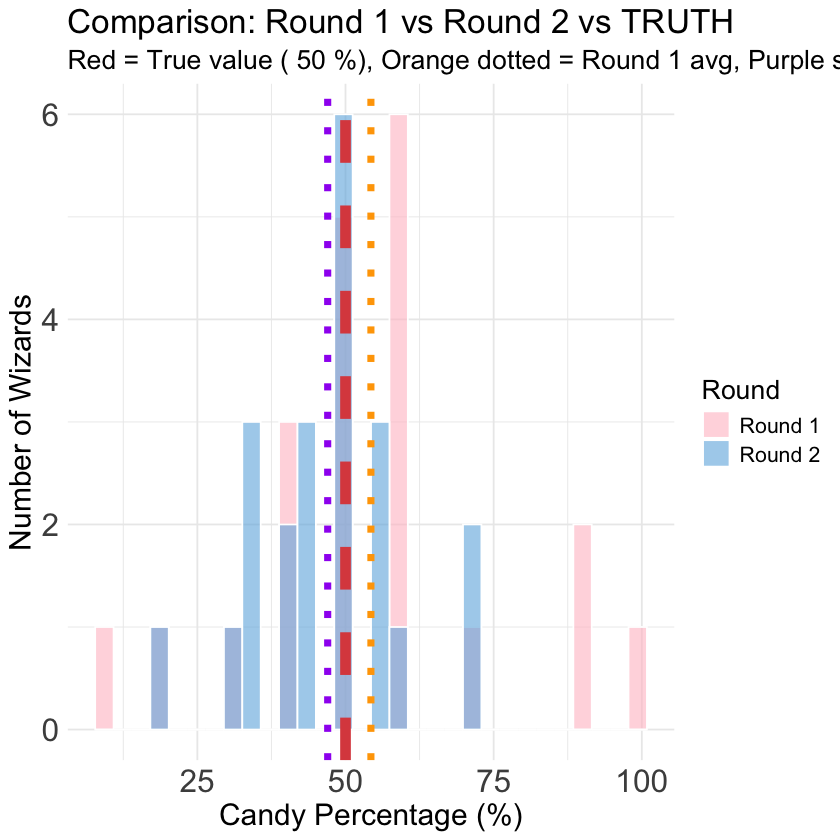

In [31]:
# Create the overlay plot WITH the true value line
hist_true <- ggplot(combined_data, aes(x = candy_percentage, fill = round)) +
  geom_histogram(alpha = 0.6, position = "identity", color = "white") +
  geom_vline(xintercept = TRUE_CANDY_PERCENTAGE, color = "#dc4d4d", linewidth = 3, linetype = "dashed") +
  geom_vline(xintercept = round1_avg, color = "orange", linewidth = 2, linetype = "dotted") +
  geom_vline(xintercept = round2_avg, color = "purple", linewidth = 2, linetype = "dotted") +
  scale_fill_manual(values = c("Round 1" = "pink", "Round 2" = "#6cb2e0")) +
  labs(
    title = "Comparison: Round 1 vs Round 2 vs TRUTH",
    subtitle = paste("Red = True value (", TRUE_CANDY_PERCENTAGE, "%), Orange dotted = Round 1 avg, Purple solid = Round 2 avg"),
    x = "Candy Percentage (%)",
    y = "Number of Wizards",
    fill = "Round"
  ) +
  theme_minimal() +
  theme(text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 19))

print(hist_true)


# Calculate how close each round was to the truth
round1_error <- abs(round1_avg - TRUE_CANDY_PERCENTAGE)
round2_error <- abs(round2_avg - TRUE_CANDY_PERCENTAGE)

cat("\n🔮 ACCURACY ANALYSIS:\n")
cat("Round 1 average:", round(round1_avg, 2), "% (difference from truth:", round(round1_error, 2), "%)\n")
cat("Round 2 average:", round(round2_avg, 2), "% (difference from truth:", round(round2_error, 2), "%)\n")

if(round1_error < round2_error) {
  winner_round <- "Round 1"
  better_error <- round1_error
} else if(round2_error < round1_error) {
  winner_round <- "Round 2"  
  better_error <- round2_error
} else {
  winner_round <- "TIE"
  better_error <- round1_error
}

cat("\n🏆 WINNER: ", winner_round, " was closer to the true population parameter!\n")
if(winner_round != "TIE") {
  cat("📈 The winning round was only", round(better_error, 2), "% away from the truth!\n")
}

### 6.2 Who Actually Got It Right?

In [32]:
# Now we can determine who actually got the predictions right!

# Round 1 winners
round1_final <- round1_with_predictions %>%
  mutate(got_it_right = predicted_answer == CORRECT_ANSWER)

round1_winners <- round1_final %>%
  filter(got_it_right == TRUE)

cat("🏆 ROUND 1 WINNERS (Wizards who got it right):\n")
if(nrow(round1_winners) > 0) {
  for(i in seq_len(nrow(round1_winners))) {
    cat("⭐", round1_winners$wizard_name[i], "- Found", round1_winners$candy_count[i], "candies - Predicted:", round1_winners$predicted_answer[i], "\n")
  }
} else {
  cat("No wizards got it exactly right in Round 1!\n")
}

# Round 2 winners  
round2_final <- round2_with_predictions %>%
  mutate(got_it_right = predicted_answer == CORRECT_ANSWER)

round2_winners <- round2_final %>%
  filter(got_it_right == TRUE)

cat("\n🏆 ROUND 2 WINNERS (Wizards who got it right):\n")
if(nrow(round2_winners) > 0) {
  for(i in seq_len(nrow(round2_winners))) {
    cat("⭐", round2_winners$wizard_name[i], "- Found", round2_winners$candy_count[i], "candies - Predicted:", round2_winners$predicted_answer[i], "\n")
  }
} else {
  cat("No wizards got it exactly right in Round 2!\n")
}

total_winners <- nrow(round1_winners) + nrow(round2_winners)
cat("\n🎉 TOTAL PREDICTION WINNERS ACROSS BOTH ROUNDS:", total_winners, "wizards!\n")

🏆 ROUND 1 WINNERS (Wizards who got it right):
⭐ Redacted - Found 5 candies - Predicted: CURSED 
⭐ jonas - Found 2 candies - Predicted: CURSED 
⭐ Arjun - Found 4 candies - Predicted: CURSED 
⭐ Pavel Pro Max Limited Edition - Found 1 candies - Predicted: CURSED 
⭐ Ibaad - Found 3 candies - Predicted: CURSED 
⭐ Anirudh - Found 5 candies - Predicted: CURSED 
⭐ Helen ヾ(＠⌒ー⌒＠)ノ - Found 5 candies - Predicted: CURSED 
⭐ Adrian - Found 5 candies - Predicted: CURSED 
⭐ Kent - Found 4 candies - Predicted: CURSED 
⭐ Abida:) - Found 5 candies - Predicted: CURSED 

🏆 ROUND 2 WINNERS (Wizards who got it right):
⭐ Amypeach - Found 4 candies - Predicted: CURSED 
⭐ Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky Hi Sky H

## 🎉 Step 7: Celebration and Learning Summary

---

## 💡 Key Learning Points:

1. **Sampling Variability**: Different samples from the same population give different results
2. **Sample Average**: Tends to be close to the true population parameter, especially with larger samples
3. **Spread**: Shows how much variation there is in our sample results
4. **Sample Size Matters**: Larger samples generally give more reliable estimates
5. **Prediction Accuracy**: Even with sampling variability, statistical methods help us make good predictions!

---

*🎭 End of Spell 6: Halloween Candy Analysis - Great work, Statistical Wizards!*